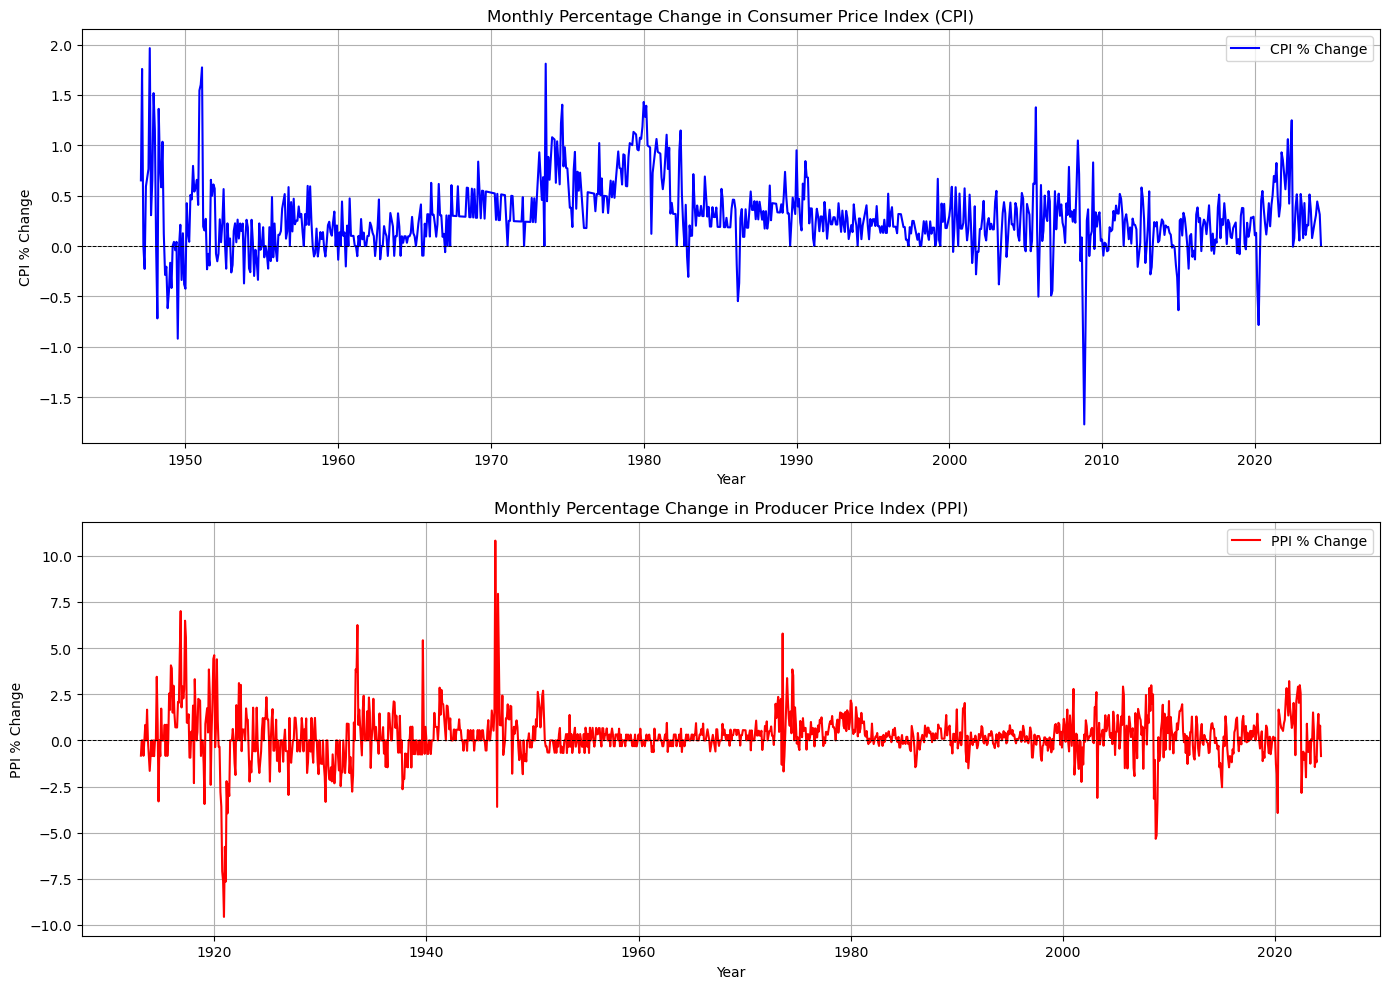

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (use your file path here)
file_path = 'CPI_PPI_All_Commodity.csv'
data = pd.read_csv(file_path)

# Convert the DATE column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Convert the CPIAUCSL_NBD19470101 column to numeric, setting non-numeric entries as NaN
data['CPIAUCSL_NBD19470101'] = pd.to_numeric(data['CPIAUCSL_NBD19470101'], errors='coerce')

# Fill NaN values with forward fill method
data['CPIAUCSL_NBD19470101'].fillna(method='ffill', inplace=True)

# Rename columns for easier access
data.columns = ['Date', 'CPI', 'PPI']

# Calculate the percentage change month-over-month for CPI and PPI
data['CPI_pct_change'] = data['CPI'].pct_change() * 100
data['PPI_pct_change'] = data['PPI'].pct_change() * 100

# Plot the percentage changes for CPI and PPI
plt.figure(figsize=(14, 10))

# CPI Percentage Change Plot
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['CPI_pct_change'], label='CPI % Change', color='blue')
plt.title('Monthly Percentage Change in Consumer Price Index (CPI)')
plt.xlabel('Year')
plt.ylabel('CPI % Change')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.7)
plt.legend()
plt.grid(True)

# PPI Percentage Change Plot
plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['PPI_pct_change'], label='PPI % Change', color='red')
plt.title('Monthly Percentage Change in Producer Price Index (PPI)')
plt.xlabel('Year')
plt.ylabel('PPI % Change')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.7)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


/Users/anbschool0010/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/anbschool0010/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/anbschool0010/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


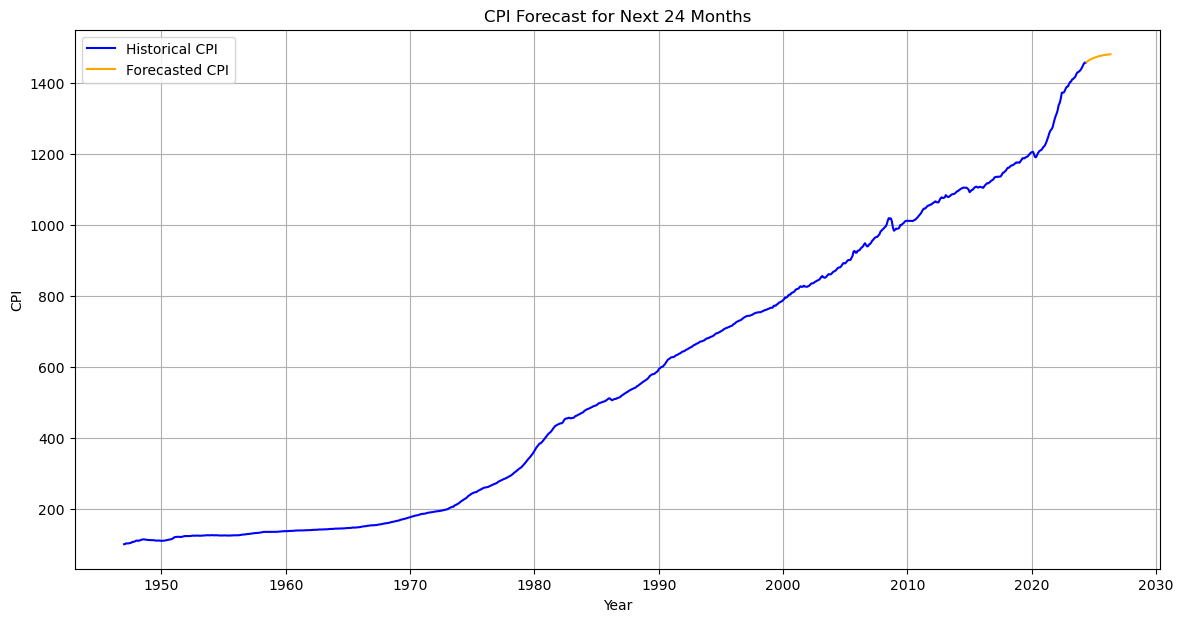

/Users/anbschool0010/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/anbschool0010/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/anbschool0010/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


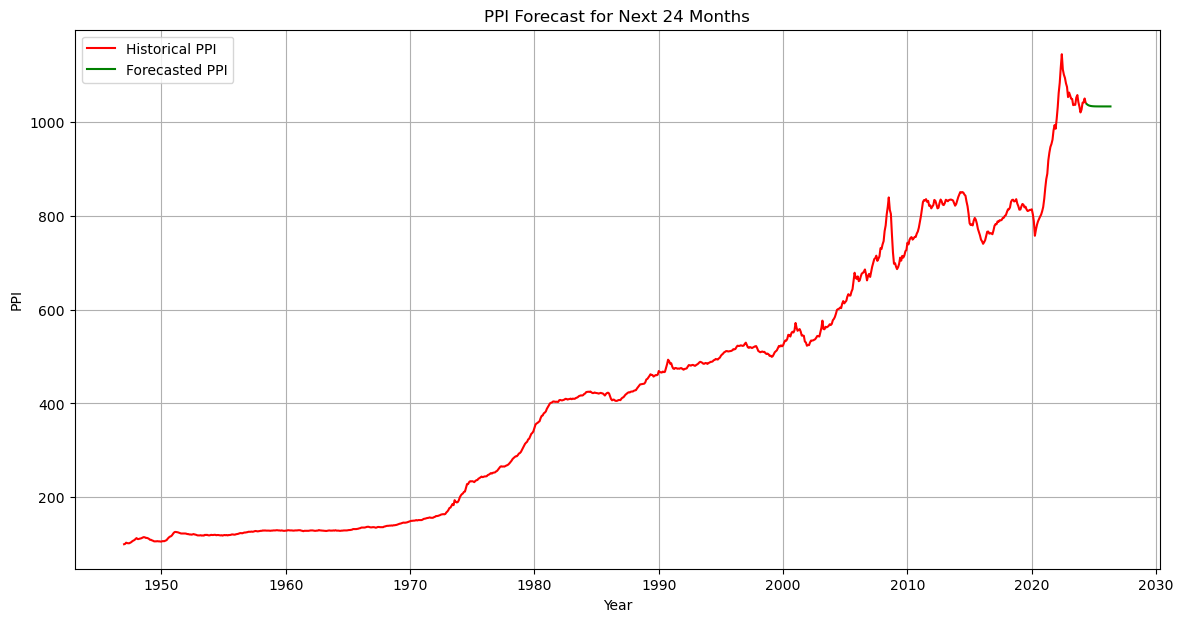

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

# Load the data (use your file path here)
file_path = 'CPI_PPI_All_Commodity.csv'
data = pd.read_csv(file_path)

# Convert the DATE column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Convert the CPIAUCSL_NBD19470101 column to numeric, setting non-numeric entries as NaN
data['CPIAUCSL_NBD19470101'] = pd.to_numeric(data['CPIAUCSL_NBD19470101'], errors='coerce')

# Fill NaN values with forward fill method
data['CPIAUCSL_NBD19470101'].fillna(method='ffill', inplace=True)

# Rename columns for easier access
data.columns = ['Date', 'CPI', 'PPI']

# Set Date as index
data.set_index('Date', inplace=True)

# Drop rows where CPI is NaN (before 1947)
data = data.dropna(subset=['CPI'])

# ARIMA model for CPI
cpi_model = ARIMA(data['CPI'], order=(5, 1, 0))  # ARIMA(p,d,q)
cpi_fit = cpi_model.fit()

# Forecast CPI for the next 24 months
cpi_forecast = cpi_fit.forecast(steps=24)

# Create a date range for the forecast period
forecast_dates = pd.date_range(start=data.index[-1] + timedelta(days=30), periods=24, freq='M')

# Plot historical and forecasted CPI
plt.figure(figsize=(14, 7))
plt.plot(data['CPI'], label='Historical CPI', color='blue')
plt.plot(forecast_dates, cpi_forecast, label='Forecasted CPI', color='orange')
plt.title('CPI Forecast for Next 24 Months')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.legend()
plt.grid(True)
plt.show()

# ARIMA model for PPI
ppi_model = ARIMA(data['PPI'], order=(1, 1, 1))  # ARIMA(p,d,q)
ppi_fit = ppi_model.fit()

# Forecast PPI for the next 24 months
ppi_forecast = ppi_fit.forecast(steps=24)

# Plot historical and forecasted PPI
plt.figure(figsize=(14, 7))
plt.plot(data['PPI'], label='Historical PPI', color='red')
plt.plot(forecast_dates, ppi_forecast, label='Forecasted PPI', color='green')
plt.title('PPI Forecast for Next 24 Months')
plt.xlabel('Year')
plt.ylabel('PPI')
plt.legend()
plt.grid(True)
plt.show()


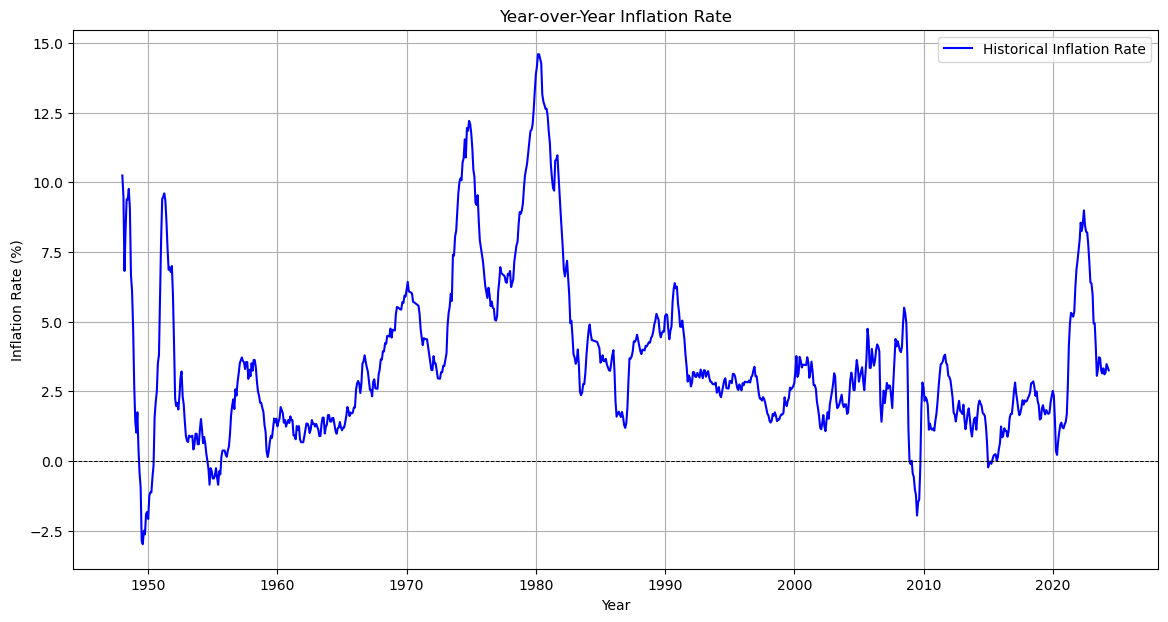

/Users/anbschool0010/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/anbschool0010/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/anbschool0010/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


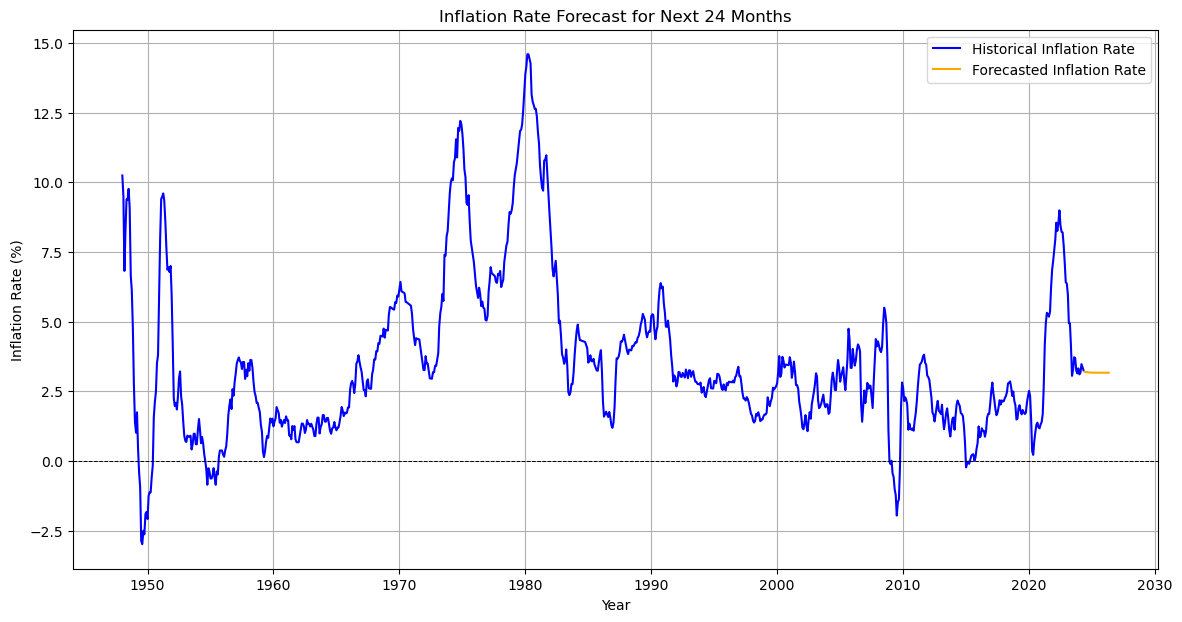

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

# Load the data (use your file path here)
file_path = 'CPI_PPI_All_Commodity.csv'
data = pd.read_csv(file_path)

# Convert the DATE column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Convert the CPIAUCSL_NBD19470101 column to numeric, setting non-numeric entries as NaN
data['CPIAUCSL_NBD19470101'] = pd.to_numeric(data['CPIAUCSL_NBD19470101'], errors='coerce')

# Fill NaN values with forward fill method
data['CPIAUCSL_NBD19470101'].fillna(method='ffill', inplace=True)

# Rename columns for easier access
data.columns = ['Date', 'CPI', 'PPI']

# Set Date as index
data.set_index('Date', inplace=True)

# Drop rows where CPI is NaN (before 1947)
data = data.dropna(subset=['CPI'])

# Calculate the year-over-year percentage change in CPI (inflation rate)
data['Inflation_Rate'] = data['CPI'].pct_change(periods=12) * 100

# Drop the initial 12 months which have NaN values in Inflation Rate
data = data.dropna(subset=['Inflation_Rate'])

# Plot the historical inflation rate
plt.figure(figsize=(14, 7))
plt.plot(data['Inflation_Rate'], label='Historical Inflation Rate', color='blue')
plt.title('Year-over-Year Inflation Rate')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.7)
plt.legend()
plt.grid(True)
plt.show()

# ARIMA model for Inflation Rate
inflation_model = ARIMA(data['Inflation_Rate'], order=(5, 1, 0))  # ARIMA(p,d,q)
inflation_fit = inflation_model.fit()

# Forecast Inflation Rate for the next 24 months
inflation_forecast = inflation_fit.forecast(steps=24)

# Create a date range for the forecast period
forecast_dates = pd.date_range(start=data.index[-1] + timedelta(days=30), periods=24, freq='M')

# Plot historical and forecasted Inflation Rate
plt.figure(figsize=(14, 7))
plt.plot(data['Inflation_Rate'], label='Historical Inflation Rate', color='blue')
plt.plot(forecast_dates, inflation_forecast, label='Forecasted Inflation Rate', color='orange')
plt.title('Inflation Rate Forecast for Next 24 Months')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.7)
plt.legend()
plt.grid(True)
plt.show()


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

# Load the data (use your file path here)
file_path = 'CPI_PPI_All_Commodity.csv'
data = pd.read_csv(file_path)

# Convert the DATE column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Convert the CPIAUCSL_NBD19470101 column to numeric, setting non-numeric entries as NaN
data['CPIAUCSL_NBD19470101'] = pd.to_numeric(data['CPIAUCSL_NBD19470101'], errors='coerce')

# Fill NaN values with forward fill method
data['CPIAUCSL_NBD19470101'].fillna(method='ffill', inplace=True)

# Rename columns for easier access
data.columns = ['Date', 'CPI', 'PPI']

# Set Date as index
data.set_index('Date', inplace=True)

# Drop rows where CPI is NaN (before 1947)
data = data.dropna(subset=['CPI'])

# Calculate the year-over-year percentage change in CPI (inflation rate)
data['Inflation_Rate'] = data['CPI'].pct_change(periods=12) * 100

# Drop the initial 12 months which have NaN values in Inflation Rate
data = data.dropna(subset=['Inflation_Rate'])

# Define an inflation threshold (e.g., 2%)
inflation_threshold = 2.0

# Identify periods where the inflation rate is above the threshold
data['Inflation_Period'] = data['Inflation_Rate'] > inflation_threshold

# Detect the start and end of each inflation period
inflation_periods = []
in_inflation = False
start_date = None

for date, is_inflation in data['Inflation_Period'].iteritems():
    if is_inflation and not in_inflation:
        # Inflation period starts
        start_date = date
        in_inflation = True
    elif not is_inflation and in_inflation:
        # Inflation period ends
        end_date = date - timedelta(days=1)
        inflation_periods.append((start_date, end_date))
        in_inflation = False

# If the last period is still ongoing
if in_inflation:
    end_date = data.index[-1]
    inflation_periods.append((start_date, end_date))

# Print detected inflation periods
for start, end in inflation_periods:
    print(f"Inflation Period: Start = {start}, End = {end}")

# Plot the inflation rate and mark the periods of inflation
plt.figure(figsize=(14, 7))
plt.plot(data['Inflation_Rate'], label='Inflation Rate', color='blue')
for start, end in inflation_periods:
    plt.axvspan(start, end, color='orange', alpha=0.3, label='Inflation Period' if start == inflation_periods[0][0] else "")
plt.title('Year-over-Year Inflation Rate with Detected Inflation Periods')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.axhline(y=inflation_threshold, color='red', linestyle='--', linewidth=0.7, label=f'Threshold = {inflation_threshold}%')
plt.legend()
plt.grid(True)
plt.show()


AttributeError: 'Series' object has no attribute 'iteritems'

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

# Load the data
file_path = 'CPI_PPI_All_Commodity.csv'  # Adjust path if running locally
data = pd.read_csv(file_path)

# Convert the DATE column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Convert the CPI column to numeric, setting non-numeric entries as NaN
data['CPIAUCSL_NBD19470101'] = pd.to_numeric(data['CPIAUCSL_NBD19470101'], errors='coerce')

# Fill NaN values with forward fill method
data['CPIAUCSL_NBD19470101'].fillna(method='ffill', inplace=True)

# Rename columns for easier access
data.columns = ['Date', 'CPI', 'PPI']

# Filter data to start from the year 2000
data = data[data['Date'] >= '2000-01-01']

# Set Date as index and convert to monthly period
data.set_index('Date', inplace=True)
data.index = data.index.to_period('M')

# Calculate the year-over-year percentage change in CPI (inflation rate)
data['Inflation_Rate'] = data['CPI'].pct_change(periods=12) * 100

# Drop the initial 12 months which have NaN values in Inflation Rate
data = data.dropna(subset=['Inflation_Rate'])

# Define an inflation threshold (e.g., 2%)
inflation_threshold = 2.0

# Identify periods where the inflation rate is above the threshold
data['Inflation_Period'] = data['Inflation_Rate'] > inflation_threshold

# Detect the start and end of each inflation period
inflation_periods = []
in_inflation = False
start_date = None


